<a href="https://colab.research.google.com/github/Siddhi124github/data-science-prac-1-and-2/blob/main/VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

T096 SIDDHI NAIK

PRACTICAL NO 10
Data Visualization and Storytelling
 Create meaningful visualizations using data visualization tools
 Combine multiple visualizations to tell a compelling data story.
 Present the findings and insights in a clear and concise manner.

The dataset tracks how daily habits—screen time, sleep duration, stress levels, and social media usage—interact with each other. The visualizations reveal a simple but important pattern: the more time students spend on screens, especially on social media, the worse their sleep and mental state become.

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("mental_health_social_media_dataset.csv")

# Print first 5 rows
print(df.head())


        person_name  age       date  gender   platform  daily_screen_time_min  \
0     Reyansh Ghosh   35   1/1/2024    Male  Instagram                    320   
1        Neha Patel   24  1/12/2024  Female  Instagram                    453   
2      Ananya Naidu   26   1/6/2024    Male   Snapchat                    357   
3          Neha Das   66  1/17/2024  Female   Snapchat                    190   
4  Reyansh Banerjee   31  1/28/2024    Male   Snapchat                    383   

   social_media_time_min  negative_interactions_count  \
0                    160                            1   
1                    226                            1   
2                    196                            1   
3                    105                            0   
4                    211                            1   

   positive_interactions_count  sleep_hours  physical_activity_min  \
0                            2          7.4                     28   
1                            3

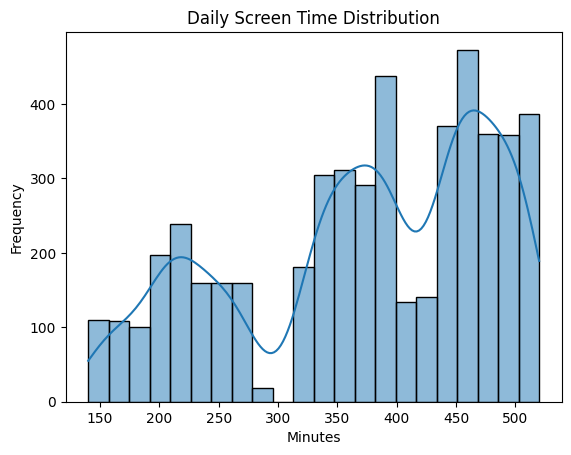

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['daily_screen_time_min'], kde=True)
plt.title("Daily Screen Time Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()


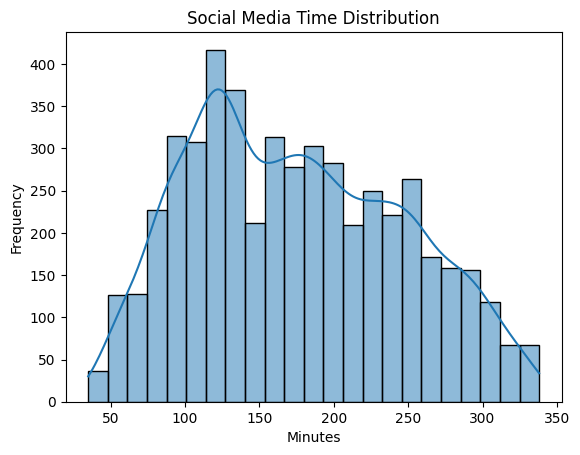

In [ ]:
sns.histplot(df['social_media_time_min'], kde=True)
plt.title("Social Media Time Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()


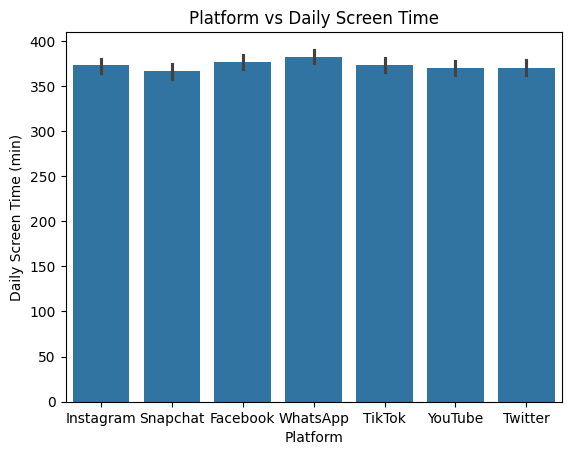

In [ ]:
sns.barplot(data=df, x='platform', y='daily_screen_time_min')
plt.title("Platform vs Daily Screen Time")
plt.xlabel("Platform")
plt.ylabel("Daily Screen Time (min)")
plt.show()


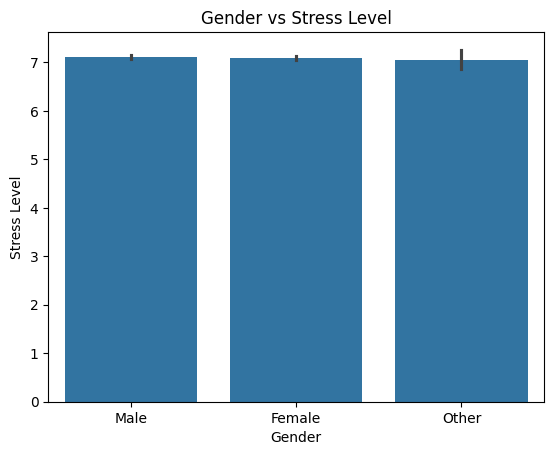

In [ ]:
sns.barplot(data=df, x='gender', y='stress_level')
plt.title("Gender vs Stress Level")
plt.xlabel("Gender")
plt.ylabel("Stress Level")
plt.show()


In [ ]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 20, 30, 40, 100],
    labels=["<20", "20-30", "30-40", "40+"]
)

print(df[['person_name','age','age_group']])


           person_name  age age_group
0        Reyansh Ghosh   35     30-40
1           Neha Patel   24     20-30
2         Ananya Naidu   26     20-30
3             Neha Das   66       40+
4     Reyansh Banerjee   31     30-40
...                ...  ...       ...
4995         Sai Menon   42       40+
4996       Neha Ansari   33     30-40
4997      Aarav Sharma   13       <20
4998      Aadhya Patil   21     20-30
4999       Shaurya Das   42       40+

[5000 rows x 3 columns]


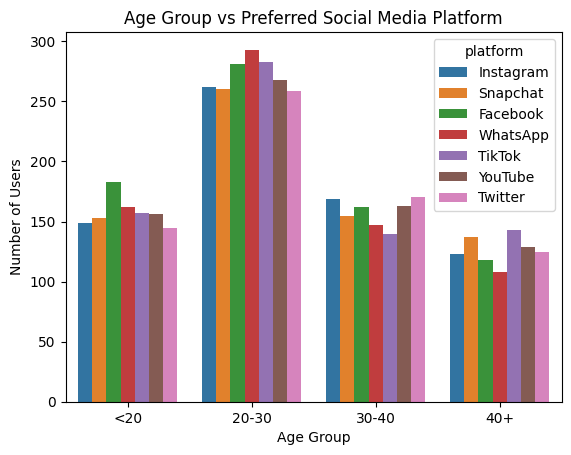

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='age_group', hue='platform')
plt.title("Age Group vs Preferred Social Media Platform")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()


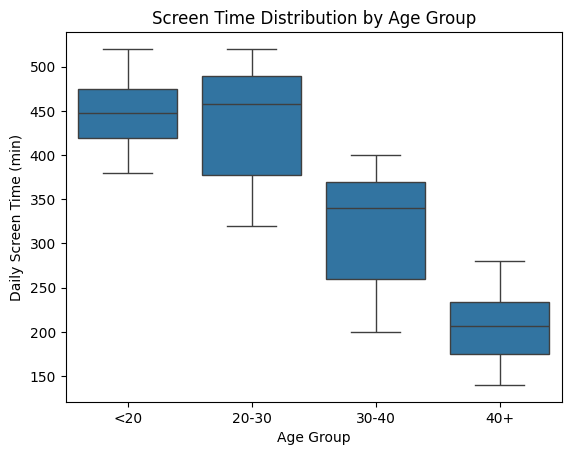

In [ ]:
sns.boxplot(data=df, x='age_group', y='daily_screen_time_min')
plt.title("Screen Time Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Daily Screen Time (min)")
plt.show()



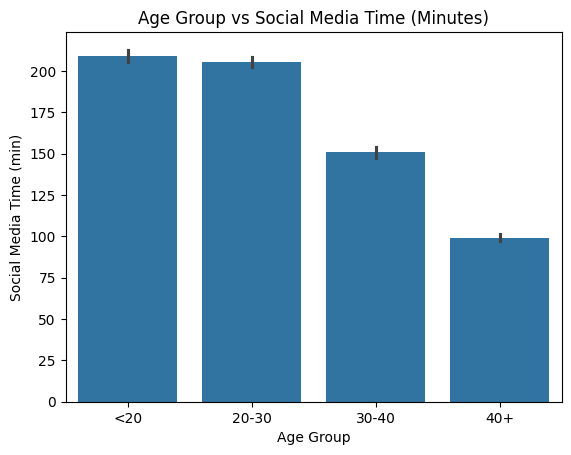

In [ ]:
sns.barplot(data=df, x='age_group', y='social_media_time_min')
plt.title("Age Group vs Social Media Time (Minutes)")
plt.xlabel("Age Group")
plt.ylabel("Social Media Time (min)")
plt.show()


In [ ]:
df['screen_group'] = pd.cut(
    df['daily_screen_time_min'],
    bins=[0, 200, 300, 400, 500, 600],
    labels=['0-200', '200-300', '300-400', '400-500', '500-600']
)






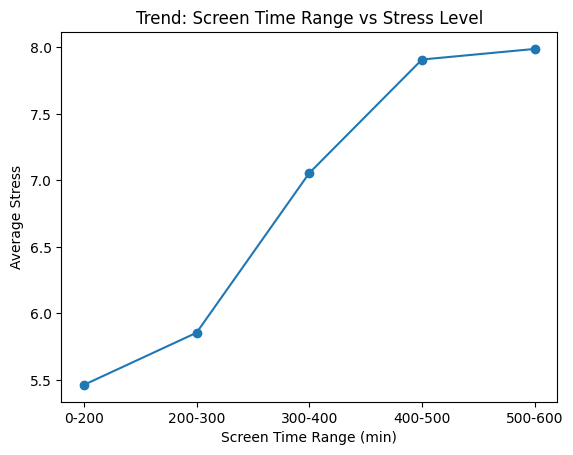

In [ ]:
plt.plot(grouped['screen_group'], grouped['stress_level'], marker='o')
plt.title("Trend: Screen Time Range vs Stress Level")
plt.xlabel("Screen Time Range (min)")
plt.ylabel("Average Stress")
plt.show()


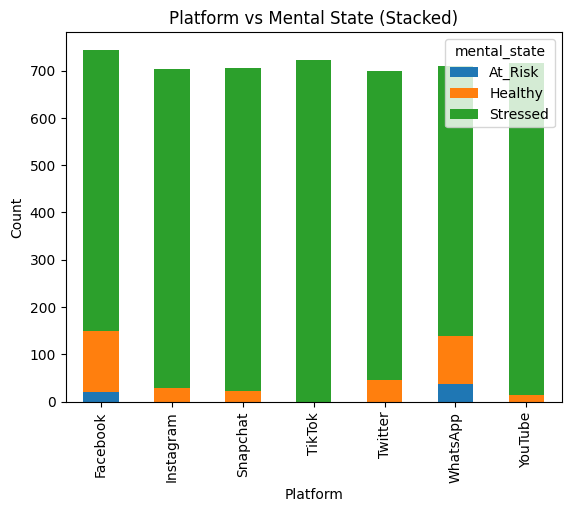

In [ ]:
table = pd.crosstab(df['platform'], df['mental_state'])
table.plot(kind='bar', stacked=True)
plt.title("Platform vs Mental State (Stacked)")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.show()


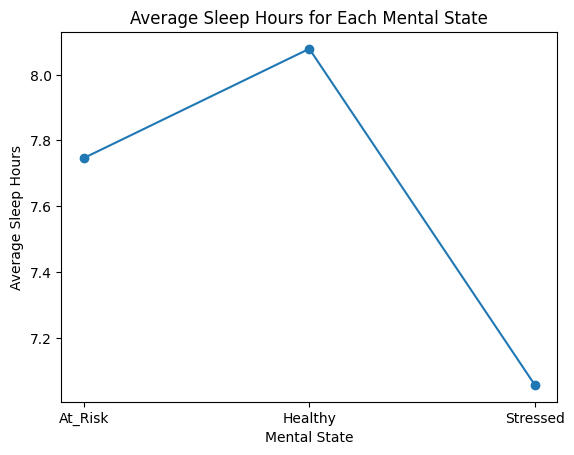

In [ ]:
grouped = df.groupby('mental_state')['sleep_hours'].mean().reset_index()

plt.plot(grouped['mental_state'], grouped['sleep_hours'], marker='o')
plt.title("Average Sleep Hours for Each Mental State")
plt.xlabel("Mental State")
plt.ylabel("Average Sleep Hours")
plt.show()



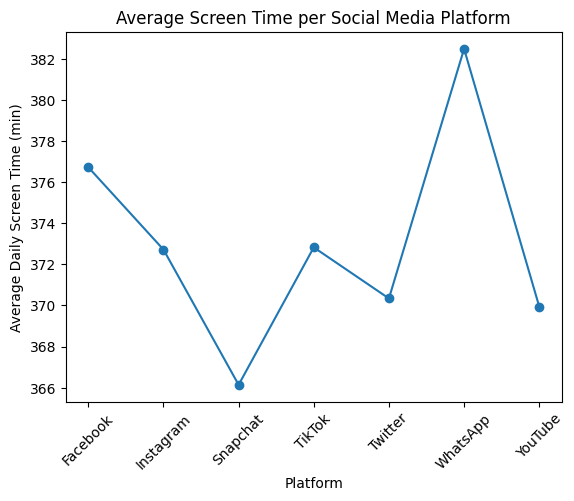

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by platform
grouped = df.groupby('platform')['daily_screen_time_min'].mean().reset_index()

plt.plot(grouped['platform'], grouped['daily_screen_time_min'], marker='o')
plt.title("Average Screen Time per Social Media Platform")
plt.xlabel("Platform")
plt.ylabel("Average Daily Screen Time (min)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['sleep_group'] = pd.cut(
    df['sleep_hours'],
    bins=[0,4,6,8,10,12],
    labels=['0–4 hrs','4–6 hrs','6–8 hrs','8–10 hrs','10–12 hrs']
)


In [ ]:
grouped = df.groupby('sleep_group')['stress_level'].mean().reset_index()


/tmp/ipython-input-3206875404.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('sleep_group')['stress_level'].mean().reset_index()


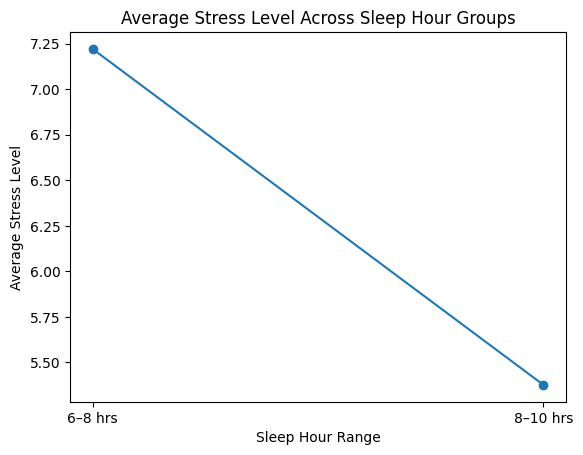

In [ ]:
plt.plot(grouped['sleep_group'], grouped['stress_level'], marker='o')
plt.title("Average Stress Level Across Sleep Hour Groups")
plt.xlabel("Sleep Hour Range")
plt.ylabel("Average Stress Level")
plt.show()


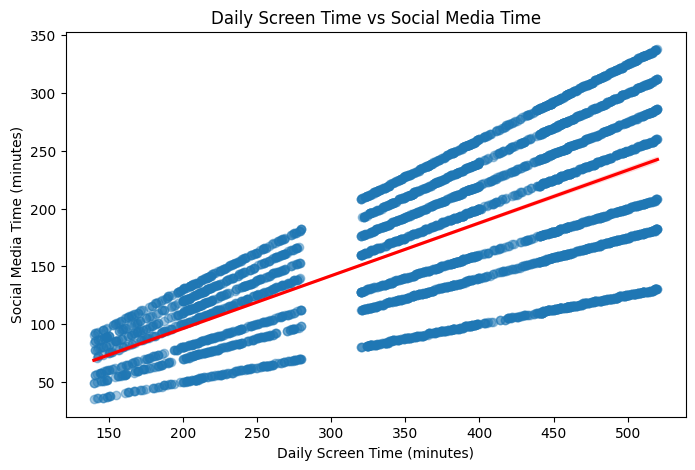

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x='daily_screen_time_min',
    y='social_media_time_min',
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)

plt.title("Daily Screen Time vs Social Media Time")
plt.xlabel("Daily Screen Time (minutes)")
plt.ylabel("Social Media Time (minutes)")
plt.show()
